<a href="https://colab.research.google.com/github/dylan-greenberg/Python-Projects-Labs/blob/main/Lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset.  Your target variable is total sales revenue.  


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Superstore Data Dictionary

 ORDER VARIABLES:
 - Order ID
 - Order Date
 - Order Year Month - Year and month of the order
 - Order Type - Was the order completed at a store or online? (Retail, Online)
 - Quantity - Quantity ordered for the product

 CUSTOMER VARIABLES:
 - Customer Name
 - City
 - State Province
 - Email


PRODUCT VARIABLES:
 - Product Name
 - Product Line - Category of the product (i.e. Bikes Phones)
 - Product Price - Price in US Dollars
 - Product Status - Current status of the product (Active, Inactive)

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [ ]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe.  
- If your record count doesn't match the source file, then resolve the issue

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/refs/heads/main/Labs/DataSets/superstore_retail_orders.csv')
df.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56043 entries, 0 to 56042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56043 non-null  int64  
 1   order_date        56011 non-null  object 
 2   order_year_month  56011 non-null  object 
 3   customer_name     56043 non-null  object 
 4   city              55569 non-null  object 
 5   state_province    55569 non-null  object 
 6   email             56043 non-null  object 
 7   order_type        56043 non-null  object 
 8   quantity          56004 non-null  float64
 9   product_name      56043 non-null  object 
 10  product_line      56043 non-null  object 
 11  product_price     56043 non-null  float64
 12  product_status    56043 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,order_id,quantity,product_price
count,56043.000000,56004.000000,56043.000000
mean,61668.410578,3.348582,6198.309433
std,7508.142486,422.654112,35784.965255
min,45079.000000,1.000000,2.290000
25%,55644.500000,1.000000,7.950000
50%,61870.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [ ]:
nullOrders = df[df['quantity'] == 0].shape
print(nullOrders)


(0, 13)


In [ ]:
price = df.loc[df['product_price']>5000, ['product_name', 'product_price']]
print(price.head(20))

                product_name  product_price
36546  Half-Finger Gloves, L       235481.0
36547  Half-Finger Gloves, L       235481.0
36548  Half-Finger Gloves, L       235481.0
36549  Half-Finger Gloves, L       235481.0
36550  Half-Finger Gloves, L       235481.0
36551  Half-Finger Gloves, L       235481.0
36552  Half-Finger Gloves, L       235481.0
36553  Half-Finger Gloves, L       235481.0
36554  Half-Finger Gloves, L       235481.0
36555  Half-Finger Gloves, L       235481.0
36556  Half-Finger Gloves, L       235481.0
36557  Half-Finger Gloves, L       235481.0
36558  Half-Finger Gloves, L       235481.0
36559  Half-Finger Gloves, L       235481.0
36560  Half-Finger Gloves, L       235481.0
36561  Half-Finger Gloves, L       235481.0
36562  Half-Finger Gloves, L       235481.0
36563  Half-Finger Gloves, L       235481.0
36564  Half-Finger Gloves, L       235481.0
36565  Half-Finger Gloves, L       235481.0


In [ ]:
orderID = df['order_id'].count()
print(orderID)

56043


In [ ]:
price = df.loc[df['quantity']>100, ['product_name', 'product_price']]
print(price.head(20))

                                            product_name  product_price
33727                              Water Bottle - 30 oz.           4.99
33822                              Water Bottle - 30 oz.           4.99
44626                                Projector Black, 44        3374.99
45857                               Gaming Laptop Silver        3578.27
55308  Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...         914.62


In [ ]:
price = df.loc[df['quantity']>10000, ['product_name', 'product_price']]
print(price.head(20))

                product_name  product_price
33822  Water Bottle - 30 oz.           4.99


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Create a total_amount variable, based on the product price and quantity

In [ ]:
df['product_price'] = pd.to_numeric(df['product_price'])
df['quantity'] = pd.to_numeric(df['quantity'])
df['order_id'] = pd.to_numeric(df['order_id'])

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')

In [ ]:
df.describe()

,order_id,quantity,product_price,date
count,56043.000000,56004.000000,56043.000000,55956
mean,61668.410578,3.348582,6198.309433,2023-11-10 20:59:29.890628096
min,45079.000000,1.000000,2.290000,1922-06-28 00:00:00
25%,55644.500000,1.000000,7.950000,2023-10-06 00:00:00
50%,61870.000000,1.000000,475.600000,2024-01-10 00:00:00
75%,68097.000000,2.000000,914.620000,2024-04-11 00:00:00
max,74147.000000,100000.000000,235481.000000,2029-08-02 00:00:00
std,7508.142486,422.654112,35784.965255,NaN


In [ ]:
OutlierDates = df.loc[df['order_date']<'2000-01-01', ['order_date', 'product_name']]
print(OutlierDates.head(50))

      order_date                                       product_name
1566  1922-06-28                            Mountain-500 Silver, 40
2098  1922-06-28                          Mountain-400-W Silver, 38
3866  1922-06-28                              Touring-1000 Blue, 60
5068  1922-06-28                            Touring-1000 Yellow, 54
5382  1922-06-28                            Touring-1000 Yellow, 46
7976  1922-06-28  LG 108 cm (43 inches) 4K Ultra HD Smart LED TV...
7977  1922-06-28  LG 108 cm (43 inches) 4K Ultra HD Smart LED TV...
10237 1922-06-28  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...
11303 1922-06-28  Redmi 126 cm (50 inches) 4K Ultra HD Android S...
12092 1922-06-28  Kodak 139 cm (55 inches) 4K Ultra HD Smart LED...
13453 1922-06-28                                  Touring Tire Tube
15619 1922-06-28  Inventis 5V 1.2W Portable Flexible USB LED Lig...
15620 1922-06-28  Inventis 5V 1.2W Portable Flexible USB LED Lig...
15621 1922-06-28  Inventis 5V 1.2W Portable Flex

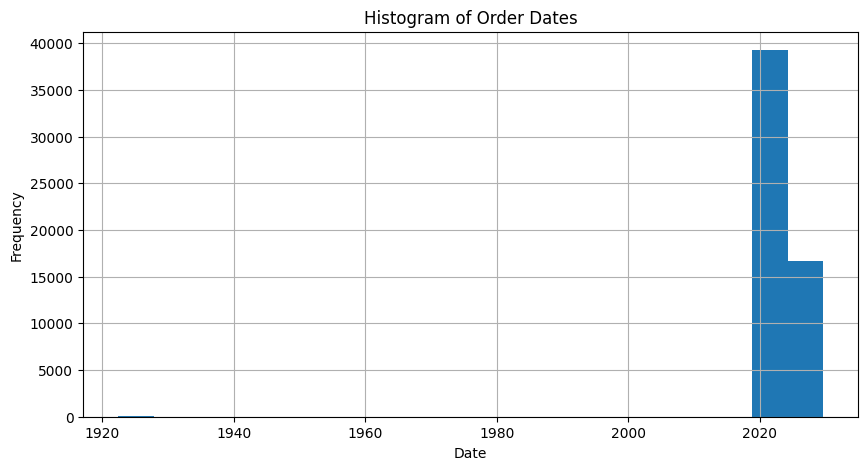

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a histogram of the dates
plt.figure(figsize=(10, 5))
df['order_date'].hist(bins=20)  # Adjust bins as needed
plt.title('Histogram of Order Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

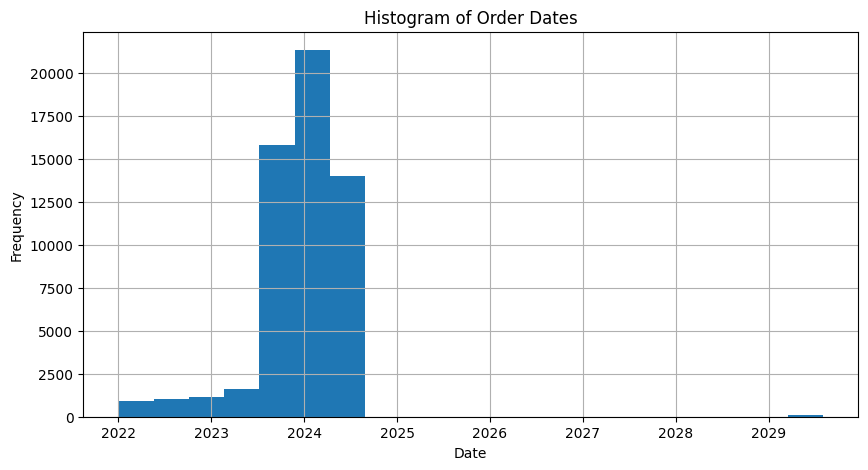

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a histogram of the dates
filtered_df = df[df['order_date'] > '2019-01-01']
plt.figure(figsize=(10, 5))
filtered_df['order_date'].hist(bins=20)  # Adjust bins as needed
plt.title('Histogram of Order Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

In [ ]:
clean_df = df[df['product_price'] < 5000]
clean_df = df[df['order_date'] > '2020-01-01']
clean_df['order_total'] = clean_df['product_price']*clean_df['quantity']
clean_df.head(10)

<ipython-input-105-89d533b06489>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['order_total'] = clean_df['product_price']*clean_df['quantity']


,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,date,order_total
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2023-07-01,1949.97
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2023-07-01,2599.96
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2023-07-02,3249.95
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2023-07-04,649.99
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2023-07-08,649.99
5,51319,2023-07-09,2023-07,Troy Rodriguez,South Brendamouth,Ohio,troy_rodriguez@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2023-07-09,649.99
6,51357,2023-07-11,2023-07,Natalie Phillips,Rachelburgh,Alabama,natalie_phillips@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2023-07-11,649.99
7,51371,2023-07-12,2023-07,Dalton Mitchell,Michaeltown,Virginia,dalton_mitchell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2023-07-12,649.99
8,51424,2023-07-15,2023-07,Timothy James,West Pamela,New York,timothy_james@email.com,Retail,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2023-07-15,649.99
9,51452,2023-07-17,2023-07,Fernando Scott,East Maureenbury,South Dakota,fernando_scott@email.com,Retail,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2023-07-17,649.99


In [ ]:
df_null_count = clean_df.isnull().sum()
print(df_null_count)

order_id            0
order_date          0
order_year_month    0
customer_name       0
city                0
state_province      0
email               0
order_type          0
quantity            0
product_name        0
product_line        0
product_price       0
product_status      0
date                0
order_total         0
dtype: int64


In [ ]:
clean_df = clean_df.dropna()
df_null_count = clean_df.isnull().sum()
print(df_null_count)

order_id            0
order_date          0
order_year_month    0
customer_name       0
city                0
state_province      0
email               0
order_type          0
quantity            0
product_name        0
product_line        0
product_price       0
product_status      0
date                0
order_total         0
dtype: int64


## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales Revenue

Create at least three charts showing revenue broken out by another variable.  

Each visualization should bring some insight into the total sales. You can use any variables for these sample plots.

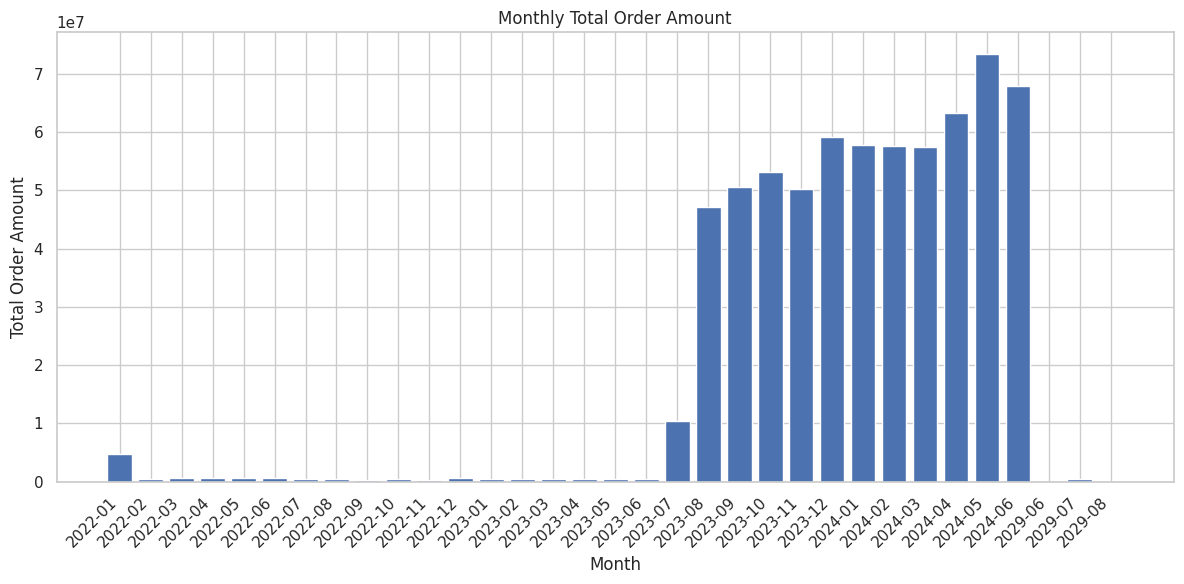

In [ ]:
# prompt: create a bar graph that shows order_total for the month as a time series analysis

import matplotlib.pyplot as plt
# Group data by month and calculate total order amount for each month
monthly_order_total = clean_df.groupby(clean_df['order_date'].dt.to_period('M'))['order_total'].sum()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(monthly_order_total.index.astype(str), monthly_order_total.values)
plt.xlabel('Month')
plt.ylabel('Total Order Amount')
plt.title('Monthly Total Order Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


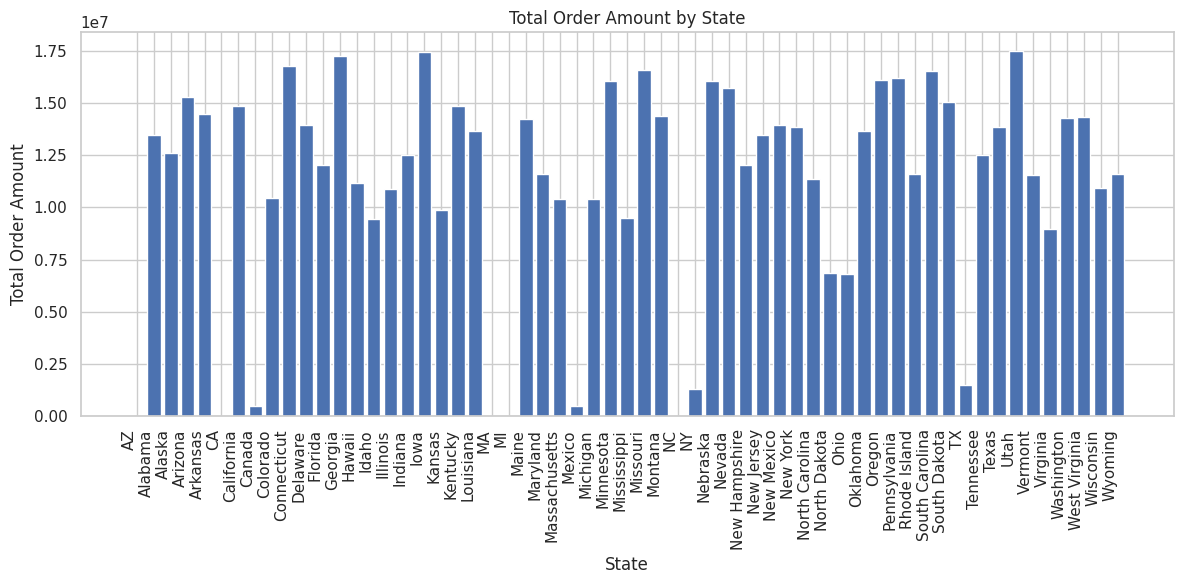

In [ ]:
# prompt: create a visualization that shows order total by state all time.

import matplotlib.pyplot as plt
state_order_total = clean_df.groupby('state_province')['order_total'].sum()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(state_order_total.index, state_order_total.values)
plt.xlabel('State')
plt.ylabel('Total Order Amount')
plt.title('Total Order Amount by State')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


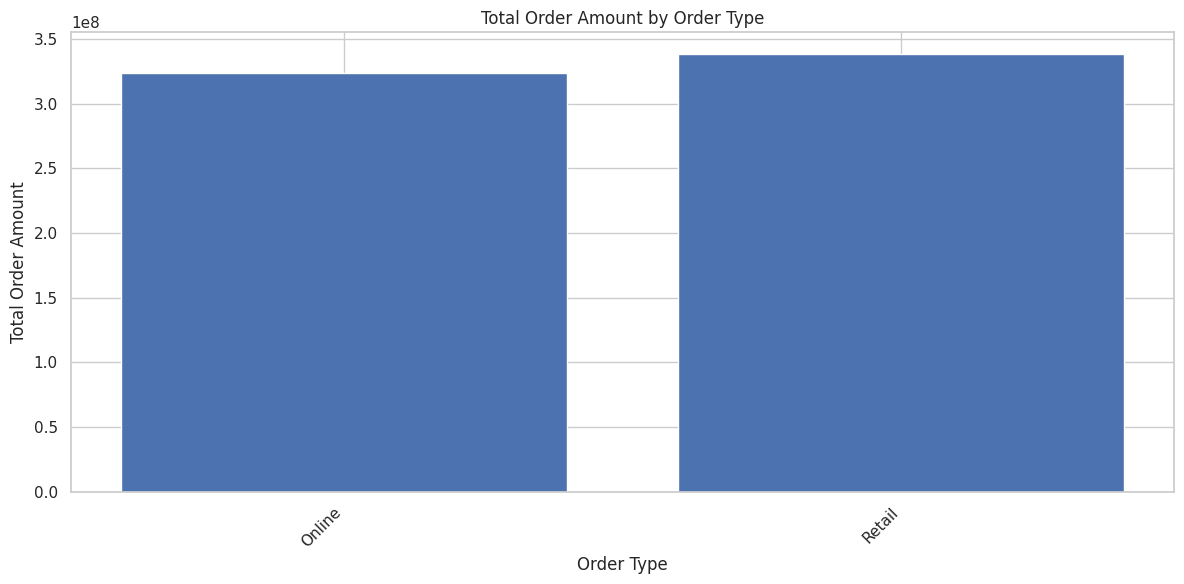

In [ ]:
# prompt: now create a chart to show order total by order type

import matplotlib.pyplot as plt
order_type_order_total = clean_df.groupby('order_type')['order_total'].sum()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(order_type_order_total.index, order_type_order_total.values)
plt.xlabel('Order Type')
plt.ylabel('Total Order Amount')
plt.title('Total Order Amount by Order Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
